In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Adjust the path as necessary
labels_path = '/content/drive/MyDrive/data/trainLabels.csv'
labels_df = pd.read_csv(labels_path)


Mounted at /content/drive


In [ ]:
# Convert 'level' column to string to comply with 'class_mode="categorical"'

# Add '.jpeg' extension to the 'image' column in the dataframe
labels_df['image'] = labels_df['image'].apply(lambda x: '{}.jpeg'.format(x))

labels_df['level'] = labels_df['level'].astype(str)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=os.path.join(data_dir, 'train'),
    x_col="image",
    y_col="level",  # Ensure this is now a string
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(256,256))

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=os.path.join(data_dir, 'train'),
    x_col="image",
    y_col="level",  # Ensure this is now a string
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(256,256))





Found 240 validated image filenames belonging to 5 classes.
Found 60 validated image filenames belonging to 5 classes.


In [ ]:
#MODEL 1: Complex CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization


model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(5, activation='softmax')  # Assuming 5 classes
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#MODEL 2: INCEPTION V3

In [ ]:
from tensorflow.keras.applications import InceptionV3

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_inception.trainable = False

model2 = Sequential([
    base_model_inception,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
#MODEL 3: RESNET

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_resnet.trainable = False

model3 = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train Model 1
history1 = model1.fit(train_generator, epochs=5, validation_data=validation_generator)

# Train Model 2
history2 = model2.fit(train_generator, epochs=5, validation_data=validation_generator)

# Train Model 3
history3 = model3.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
8/8 [==============================] - 72s 8s/step - loss: 2.2990 - accuracy: 0.3000 - val_loss: 1.5326 - val_accuracy: 0.1500
Epoch 2/5
8/8 [==============================] - 71s 8s/step - loss: 1.8781 - accuracy: 0.2583 - val_loss: 1.5265 - val_accuracy: 0.1000
Epoch 3/5
8/8 [==============================] - 70s 8s/step - loss: 1.5849 - accuracy: 0.3458 - val_loss: 1.5191 - val_accuracy: 0.1667
Epoch 4/5
8/8 [==============================] - 70s 8s/step - loss: 1.4507 - accuracy: 0.4500 - val_loss: 1.4489 - val_accuracy: 0.1667
Epoch 5/5
8/8 [==============================] - 66s 9s/step - loss: 1.2898 - accuracy: 0.4625 - val_loss: 1.4406 - val_accuracy: 0.1333
Epoch 1/5
8/8 [==============================] - 84s 10s/step - loss: 2.3774 - accuracy: 0.5458 - val_loss: 1.4236 - val_accuracy: 0.8000
Epoch 2/5
8/8 [==============================] - 74s 9s/step - loss: 1.4631 - accuracy: 0.7083 - val_loss: 0.9131 - val_accuracy: 0.7500
Epoch 3/5
8/8 [=========================

In [ ]:
import matplotlib.pyplot as plt

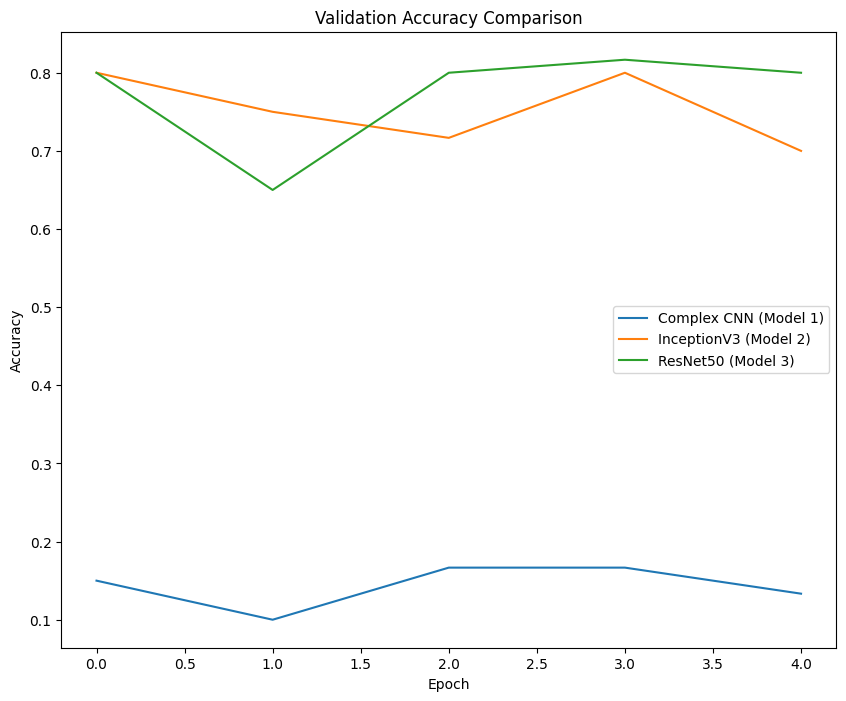

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history1.history['val_accuracy'], label='Complex CNN (Model 1)')
plt.plot(history2.history['val_accuracy'], label='InceptionV3 (Model 2)')
plt.plot(history3.history['val_accuracy'], label='ResNet50 (Model 3)')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Get the last validation accuracy for each model
val_acc_model1 = history1.history['val_accuracy'][-1]
val_acc_model2 = history2.history['val_accuracy'][-1]
val_acc_model3 = history3.history['val_accuracy'][-1]

# Compare accuracies and determine the best model
best_acc = max(val_acc_model1, val_acc_model2, val_acc_model3)
best_model = ''
if best_acc == val_acc_model1:
    best_model = 'Complex CNN'
elif best_acc == val_acc_model2:
    best_model = 'InceptionV3'
elif best_acc == val_acc_model3:
    best_model = 'ResNet50'

print(f"The best model based on validation accuracy is: {best_model} with an accuracy of {best_acc:.2f}")


The best model based on validation accuracy is: ResNet50 with an accuracy of 0.80


In [ ]:
model3.save('/content/drive/MyDrive/best_diabetic_retinopathy_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#FRONTEND PART

In [ ]:
from google.colab import files

uploaded = files.upload()

# The uploaded image's path will be the same as its name if you're uploading a single file
uploaded_image_path = list(uploaded.keys())[0]



Saving 8_right.jpeg to 8_right.jpeg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('/content/drive/MyDrive/best_diabetic_retinopathy_model.h5')

# Assuming an image has been uploaded to Colab using the file uploader
#uploaded_image_path = '/path/to/uploaded/image.jpeg'  # Update this path to the uploaded image

# Preprocess the image
img = image.load_img(uploaded_image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = img_batch / 255.0

# Make a prediction
prediction = best_model.predict(img_preprocessed)
predicted_class = np.argmax(prediction, axis=1)

# Map the prediction to the respective category
diabetic_retinopathy_classes = {
    0: 'No Diabetic Retinopathy',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferative Diabetic Retinopathy'
}

predicted_category = diabetic_retinopathy_classes[predicted_class[0]]
print(f"Predicted class: {predicted_class[0]} - {predicted_category}")


1/1 [==============================] - 2s 2s/step
Predicted class: 0 - No Diabetic Retinopathy


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_model_efficientnet = EfficientNetB0(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model_efficientnet.trainable = False  # Freeze the base model

model4 = Sequential([
    base_model_efficientnet,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Number of classes for Diabetic Retinopathy
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history4 = model4.fit(train_generator, epochs=5, validation_data=validation_generator)
